## Gapminder data - Visualization

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [266]:
gp = pd.read_csv('gapminder.csv')

In [267]:
gp.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [7]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [8]:
gp[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


In [13]:
gp[gp.year == 1965]['region'].value_counts()

Africa     53
Asia       52
Europe     44
America    33
Name: region, dtype: int64

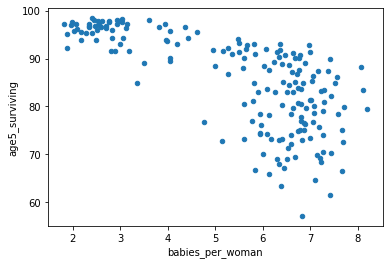

In [11]:
gp[gp.year == 1965].plot.scatter('babies_per_woman', 'age5_surviving');

In [38]:
def plotyear(year):
    data = gp[gp.year == year]
    size = 5e-6 * data.population
    color = data.region.map({'Africa' : 'skyblue', 'Asia' : 'orange', 'Europe' : 'green', 'America' : 'gold'})
    data.plot.scatter('babies_per_woman', 'age5_surviving', linewidth = 1, edgecolor ='k', s = size, c = color, figsize = (12, 9));
#     pp.legend(color);
    pp.axis(ymin=50, ymax=105, xmin=0, xmax=8)
    pp.xlabel('Babies per woman');
    pp.ylabel('children of age 5');

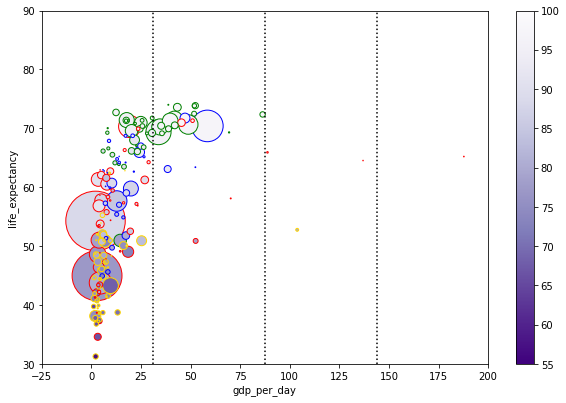

In [352]:
plotyear(1965)

In [40]:
interact(plotyear, year = widgets.IntSlider(min = 1950, max = 2015, step =1, value = 1965));

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

In [41]:
china1965 = pd.read_csv('income-1965-china.csv')
china2015 = pd.read_csv('income-2015-china.csv')
usa1965 = pd.read_csv('income-1965-usa.csv')
usa2015 = pd.read_csv('income-2015-usa.csv')

In [42]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [46]:
# china1965.min()
# china1965.max()
# china1965.quantile([0.25, 0.75])
# china1965.quantile(0.5)
# china1965.median()

income          0.041968
log10_income   -1.377078
dtype: float64

In [47]:
scipy.stats.percentileofscore(china1965.income, 1.5)

income          5.426802
log10_income    0.734544
dtype: float64

In [54]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


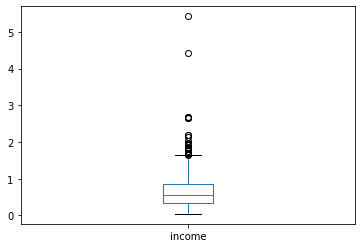

In [55]:
china1965.income.plot(kind='box');

Points outside the whiskers of the box are considered not typical and also be outliers.

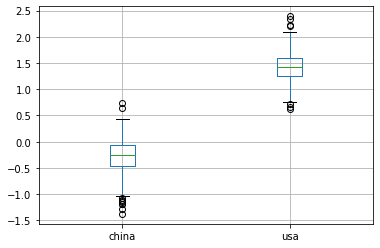

In [58]:
pd.DataFrame({'china':china1965.log10_income, 'usa':usa1965.log10_income}).boxplot();

We observe here that Poorest Amricans are richer than richest Chinese.

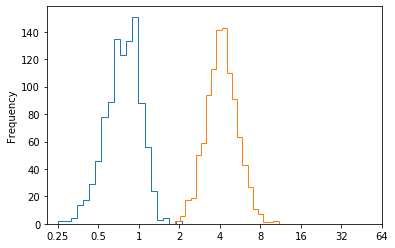

In [93]:
china1965.log10_income.plot(kind='hist', histtype = 'step', bins=20); 
usa1965.log10_income.plot(kind='hist', histtype = 'step', bins=20); 
levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log(levels), levels);

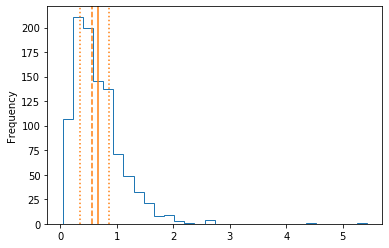

In [75]:
china1965.income.plot(kind='hist', histtype='step', bins=30)
pp.axvline(china1965.income.mean(), c='C1')
pp.axvline(china1965.income.median(), c='C1', linestyle='dashed');
pp.axvline(china1965.income.quantile(0.25), c='C1', linestyle = ':')
pp.axvline(china1965.income.quantile(0.75), c='C1', linestyle = ':');

#### Density plot of income1965

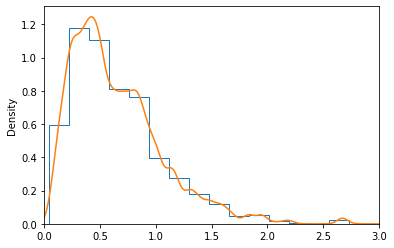

In [82]:
china1965.income.plot(kind='hist', histtype='step', bins=30, density = True)
china1965.income.plot.density(bw_method = 0.1)
pp.axis(xmin=0, xmax=3);

In [112]:
chinapop2015 = float(gp.query("country == 'China' and year == 2015").population)
usapop2015 = float(gp.query("country == 'United States' and year == 2015").population)

In [122]:
china2015['weight'] = chinapop2015/len(china2015)
usa2015['weight'] = usapop2015/len(usa2015)

In [130]:
china2015.isnull().sum()

income          0
log10_income    0
weight          0
dtype: int64

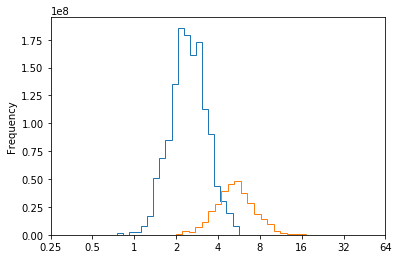

In [133]:
china2015.log10_income.plot(kind='hist', histtype = 'step', bins=20, weights = china2015['weight']); 
usa2015.log10_income.plot(kind='hist', histtype = 'step', bins=20, weights = usa2015['weight']); 
levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log(levels), levels);

In [159]:
italy = gp.query("country == 'Italy'")
india = gp.query("country == 'India'")
china = gp.query("country == 'China'")

In [172]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


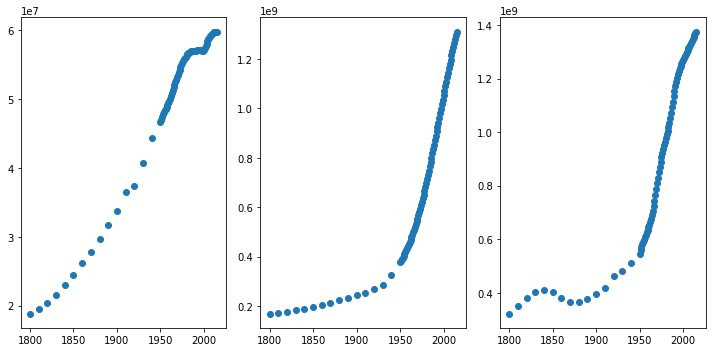

In [171]:
pp.figure(figsize=(10,5))
pp.ylabel('Population')
pp.subplot(1,3,1);
pp.scatter(data = italy, x = 'year', y ='population')
pp.subplot(1,3,2);
pp.scatter(data = india , x = 'year', y = 'population')
pp.subplot(1,3,3);
pp.scatter(data = china , x ='year', y = 'population');
pp.tight_layout()

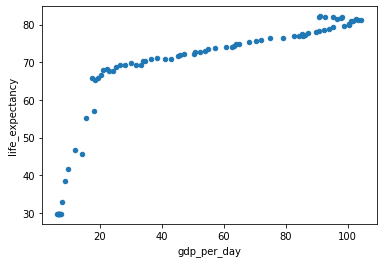

In [183]:
italy.plot.scatter('gdp_per_day', 'life_expectancy')
# pp.xticks([1, 10, 100])
# pp.xlim(0,100);

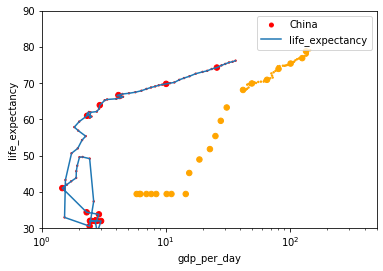

In [235]:
data = gp.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 == 0, 30, 2)
color = np.where(data.country == 'China', 'red', 'orange')
ax = data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, c = color, s = size)
# pp.xscale('log')
pp.legend(['China']);
gp[gp['country']=='China'].plot.line(x = 'gdp_per_day', y = 'life_expectancy', ax=ax);
pp.axis(xmin = 1, xmax = 500, ymin = 30, ymax = 90);

In [279]:
gp.columns

Index(['country', 'year', 'region', 'population', 'life_expectancy',
       'age5_surviving', 'babies_per_woman', 'gdp_per_capita', 'gdp_per_day'],
      dtype='object')

In [341]:
axis= pd.Series(np.arange(-25, 201, 25))
axis.quantile([0.25, 0.5, 0.75])

0.25     31.25
0.50     87.50
0.75    143.75
dtype: float64

In [339]:
def plotyear(year):
    data = gp[gp.year == year].sort_values('population', ascending = False)
    area =  5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'gold', 'Asia':'red', 'Europe':'green', 'America': 'blue'})
    data.plot.scatter('gdp_per_day', 'life_expectancy', s = area, linewidths = 1, c = color, colormap = matplotlib.cm.get_cmap('Purples_r'), 
                      vmin = 55, vmax =100, edgecolors = edgecolor, figsize = (10, 6.5), sharex = False);
    pp.axis(xmin = -25, xmax= 200, ymin = 30, ymax=90)
    
    for level in [31.25, 87.5, 143.75]:
        pp.axvline(level, linestyle = ':', color = 'k')
#     pp.legend(data.region);

In [340]:
interact(plotyear, year=range(1965, 2016, 10));

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

In [349]:
data1 = gp[gp['year']== 2015][['gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]

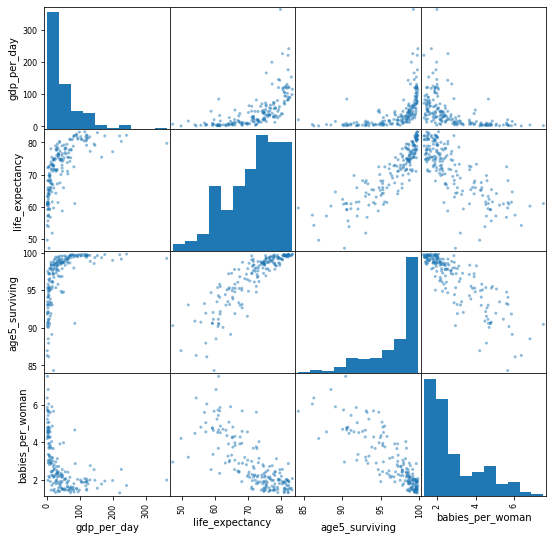

In [351]:
pd.plotting.scatter_matrix(data1, figsize=(9,9));